<a href="https://colab.research.google.com/github/esemsc-peo23/introduction-to-python/blob/main/Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assessment 1**

For our first assessment, our goal is to solve an imputation problem: we will create a neural network architecture that learns how to recover missing portions of an image.

This is an important problem in magnetic resonance imaging (MRI), where patient scans are often limited to a few areas to avoid lengthy scanning times.

In particular, we are going to focus on images of human heads. We have managed to gain access to one hundred images of patient's heads but, unfortunately, these images have a significant portion of missing information. Your goal during the assessment is to design a neural network that can recover these missing portions.

<br>

---

<br>

We do not have access to the labels for the images we want to recover, so we will have to be a bit creative to obtain a workable dataset on which to train our neural network.

Fortunately for us, we have access to a generative model that has been trained to produce realistic-looking MRI images of patient's heads. Using this model, you will create an appropriate dataset to train your architecture. We have provided you with the basic setup code to start using this generative model in **Question 1** below.

The corrupted images that we want to recover are contained in the numpy file `test_set.npy` of this repository. The file contains 100 patient images with a size of 64x64 pixels.

The architecture that you design in this assessment should use the artificially-generated dataset in order to recover the missing information in the images contained in `test_set.npy`.

<br>

All answers to the assessment should be contained within the structure below, but you are free to add new code and text cells as required to your answers. Read the text for each question and follow the instructions carefully. Answers that do not follow this structure will not be marked. **Do NOT change the name of this file.**

Please, **make sure to execute all your cells and save the result of the execution**. We will only mark cells that have been executed and will not execute any cells ourselves.

<br>

---

<br>

<br><br>

## **Question 1**  (25%)

Using the provided image-generation network, create a dataset of brain images that will later be used to train your chosen architecture.

Given that you will likely want to use this dataset multiple times during training, we recommend that you save the generated images to an appropriate folder in your GDrive.

Once you have generated your dataset, load and display ten of your generated images here.

We have also provided you with some corrupted images in the file `test_set.npy` of this repository. You should also load and display ten of these corrupted images here.

Below, we have provided template code, including some required downloads and installations, so that you can easily use the trained generative model. Sample generation in this model is done using the function `generate`, and is controlled by some input arguments. It is your job to figure out a sensible set of parameters that will produce images that are useful for the requirements of your task.

<br>

In [ ]:
#importing necessary packages
import os
import sys
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#extracting the ese_invldm package
!unzip /content/drive/MyDrive/cw1_files.zip -d ./
!chmod +x run.sh
!bash ./run.sh
sys.path.append('/content/ese-invldm')

Archive:  /content/drive/MyDrive/cw1_files.zip
replace ./files/config_training.yml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./files/config_training.yml  
replace ./run.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./run.sh                
replace ./ese-invldm/setup.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./ese-invldm/setup.py   
replace ./files/default_config.yml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./files/default_config.yml  
replace ./ese-invldm/ese_invldm/ese_invldm.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./ese-invldm/ese_invldm/ese_invldm.py  
replace ./ese-invldm/ese_invldm/__init__.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./ese-invldm/ese_invldm/__init__.py  
replace ./files/autoencoder/autoencoder_ckpt_latest.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./files/autoencoder/autoencoder_ckpt_latest.pth  
replace ./files/diffusion/diffusion_ckpt_latest.pth? [y]es, [n]o, [A]ll, [

In [ ]:
#creating a directory to save my full set of generated images
generated_images_path = '/content/drive/MyDrive/generated_images'
os.makedirs(generated_images_path, exist_ok=True)

In [ ]:
import sys
sys.path.append('/content/ese-invldm/ese_invldm')
from ese_invldm import generate

#Had an issue with connecting to ese-invldm, so I had to do a hard extraction here.

/usr/local/lib/python3.10/dist-packages/generative/networks/layers/vector_quantizer.py:86: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/usr/local/lib/python3.10/dist-packages/generative/networks/layers/vector_quantizer.py:124: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)


In [ ]:
#setting the generation parameters for the full dataset on tweaking
num_samples = 1000
batch_size = 50
num_inference_steps = 50
scheduler = 'ddim'
temperature = 0.5

In [ ]:
# generating the uncorrupted images and saving them to the drive
from ese_invldm import generate

"""
Generates samples using a diffusion-based generative model.

This function leverages a pre-configured diffusion model to produce synthetic samples.
The sampling process supports adjustable parameters for total samples, inference steps, and batch size.
A scheduler and temperature can also be configured to control the sampling behaviour.

Parameters:
    num_samples (int):
        Total number of samples to generate.
    num_inference_steps (int):
        Number of diffusion inference steps.
        The minimum number of steps is 1, but we recommend exploring the range from 10 to 50.
        Please note that more steps will increase quality but also the computational cost. Be careful not
        to burn through your credits by using a very large number of steps!
    batch_size (int):
        Number of samples to process in each batch during sampling.
    scheduler (str, optional):
        Sampling scheduler to use (e.g., "ddim", "ddpm"). You can quickly test which one provides the most appropriate results
        for this task.
    temperature (float, optional):
        Sampling temperature to control randomness, given as a number between 0 and 1. Higher values produce more diverse outputs.
    seed (int, optional):
        Random seed for reproducibility. Defaults to 42.

Returns:
    list:
        A list containing the batches of generated samples, where each sample
        corresponds to a single data instance produced by the diffusion model.

"""

#Generating and Saving the data
samples = generate(num_samples=num_samples,
                  num_inference_steps=num_inference_steps,
                  batch_size=batch_size,
                  scheduler=scheduler,
                  temperature=temperature)

np.save(os.path.join(generated_images_path, 'generated_set.pt'), samples)

'\nGenerates samples using a diffusion-based generative model.\n\nThis function leverages a pre-configured diffusion model to produce synthetic samples.\nThe sampling process supports adjustable parameters for total samples, inference steps, and batch size.\nA scheduler and temperature can also be configured to control the sampling behaviour.\n\nParameters:\n    num_samples (int):\n        Total number of samples to generate.\n    num_inference_steps (int):\n        Number of diffusion inference steps.\n        The minimum number of steps is 1, but we recommend exploring the range from 10 to 50.\n        Please note that more steps will increase quality but also the computational cost. Be careful not\n        to burn through your credits by using a very large number of steps!\n    batch_size (int):\n        Number of samples to process in each batch during sampling.\n    scheduler (str, optional):\n        Sampling scheduler to use (e.g., "ddim", "ddpm"). You can quickly test which one

In [ ]:
#saving the data
import torch
comb_tensors = torch.cat(samples, dim=0)
sample_array = comb_tensors.cpu().numpy()
np.save(os.path.join(generated_images_path, 'generated_set.npy'),sample_array)

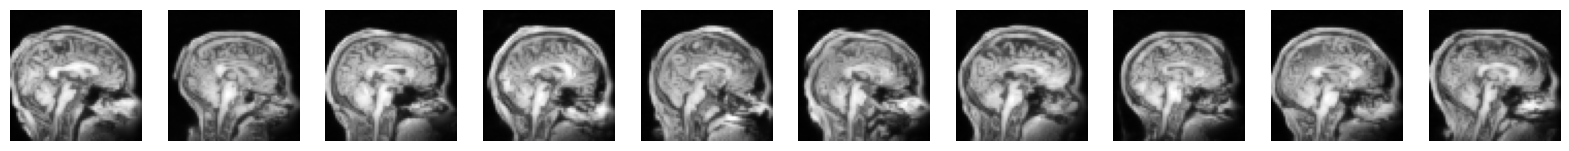

In [11]:
# Loading and displaying 10 generated images from dataset
# generated_images = sample_array
generated_images = np.load('/content/drive/MyDrive/generated_images/generated_set.npy')

# Squeezing the image to remove the extra dimension
generated_images = np.squeeze(generated_images)

# Plotting the generated images
fig, axes = plt.subplots(1, 10, figsize=(20, 4))
for i, img in enumerate(generated_images[:10]):
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
plt.show()

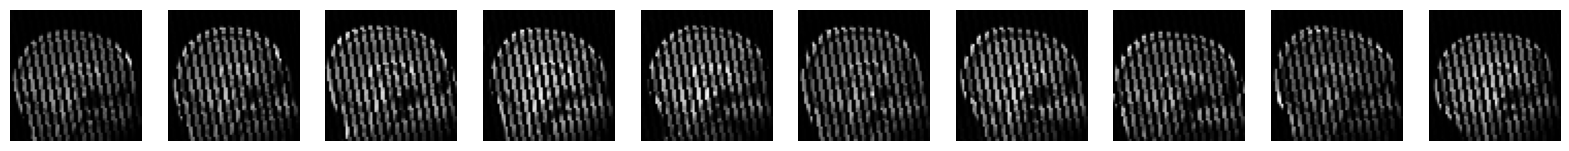

In [121]:
# Loading and displaying 10 images from the test dataset
test_set = np.load('/content/drive/MyDrive/test_set.npy')

# Squeezing the image to remove the extra dimension
test_set = np.squeeze(test_set)

fig, ax = plt.subplots(1,10,figsize=(20,4))
for i, img in enumerate(test_set[:10]):
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
plt.show()


**Choosing the Parameters for the generate Function**

I experimented with various parameter configurations to determine the optimal settings for image generation. When testing different temperature values, I found that extreme values (0.2 and 0.9) resulted in unsatisfactory outcomes, producing images that were either too dull or overly random. The best results were achieved using a temperature of 0.5, which provided a balanced level of diversity without sacrificing image quality.

Regarding the scheduler, I tested both 'ddpm' and 'ddim'. While increasing the number of inference steps with 'ddpm' did not significantly improve the output, the generated images remained noisy and lacked clarity. In contrast, the 'ddim' scheduler produced much sharper and clearer images, even with fewer inference steps. Given its ability to produce higher-quality results more efficiently, I chose to use 'ddim' for the final image generation.

<br>

---

<br>

## **Question 2**  (25%)

Using the data generated in **Question 1**, create a PyTorch `TensorDataset` and a `DataLoader` for the training set.

Using the provided corrupted images inside `test_set.npy`, create another `TensorDataset` and a `DataLoader` for the test set.

The training dataset should provide batches of brain images generated in **Question 1** and should corrupt these images appropriately so that they resemble images in the test set. The dataset should also pair each image with its corresponding un-corrupted image as a label.

The test dataset should provide the corrupted images provided, for which no labels are available.

Display here ten images of your training dataset and ten images of your test dataset, and their corresponding labels when available.

<br>



In [159]:
#importing necessary packages
from torch.utils.data import TensorDataset, DataLoader


In [162]:
# Preparing training dataset
train_images = []
train_labels = []

#Creating the mask
mask = (test_set[0] == 0).astype(float)

for i in range(len(generated_images)):
    image = generated_images[i]

    # Converting the image and mask to PyTorch tensors
    image_tensor = torch.tensor(image, dtype=torch.float32)
    mask_tensor = torch.tensor(mask, dtype=torch.float32)

    # Applying the mask to the image to create the corrupted image
    corrupted_image = image_tensor * mask_tensor

    train_images.append(corrupted_image.cpu().numpy()) # Converting back to NumPy for visualization
    train_labels.append(image)

In [168]:
train_images[0].shape

(64, 64)

In [175]:
#Preparing a validation set from the train images using a random shuffle split instead of stratified shuffle split
# as the target variable is not categorical and no specific strata are defined
from sklearn.model_selection import train_test_split

# Splitting the data randomly into train and validation sets
train_images_split, val_images_split, train_labels_split, val_labels_split = train_test_split(
    np.array(train_images), np.array(train_labels), test_size=0.2, random_state=42
)

#confirming
print(train_labels_split.shape)



(800, 64, 64)


In [177]:
# Converting train dataset to PyTorch tensors
train_dataset = TensorDataset(torch.tensor(train_images_split, dtype=torch.float32).unsqueeze(1),
                               torch.tensor(train_labels_split, dtype=torch.float32).unsqueeze(1))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [176]:
# Converting val dataset to PyTorch tensors
val_dataset = TensorDataset(torch.tensor(val_images_split, dtype=torch.float32).unsqueeze(1),
                               torch.tensor(val_labels_split, dtype=torch.float32).unsqueeze(1))
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

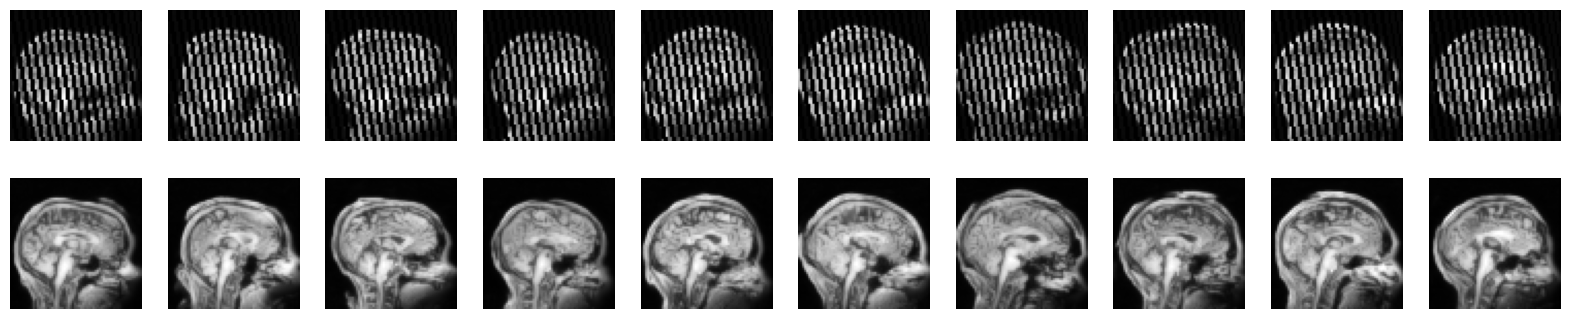

In [178]:
# Plotting the first 10 elements of the train_dataset
fig, axes = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    image, label = train_dataset[i]
    axes[0, i].imshow(image.squeeze().numpy(), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(label.squeeze().numpy(), cmap='gray')
    axes[1, i].axis('off')
plt.show()

In [169]:
test_dataset = TensorDataset(torch.tensor(test_set, dtype=torch.float32).unsqueeze(1))
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

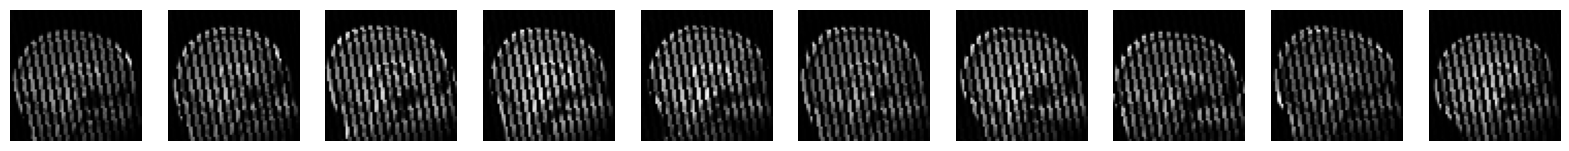

In [170]:
# Plotting the first 10 elements from the test_dataset
fig, ax = plt.subplots(1, 10, figsize=(20, 4))
for i, img in enumerate(test_set[:10]):
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
plt.show()

<br>

---

<br>

## **Question 3** (50%)

Using the dataset created in **Question 2**, design and train an architecture to recover the missing image lines of the provided test dataset.

Once you have trained your architecture, display here ten images of the test set with the recovered lines filled in.

Additionally, save the test data with the missing values filled in into a numpy file called `test_set_nogaps.npy`. These images should be **in the same order** as those in the `test_set.npy` file and should have the same pixel size of 64x64. **Any images not contained in the `test_set_nogaps.npy` file or incorrectly ordered will not be marked.**

You have freedom to choose an architecture that you consider appropriate to solve this problem. However, you will need to train your chosen architecture as part of the assessment: **pre-trained networks are not allowed**.

You will be assessed by the quality of your predictions of the missing data values and additional marks will be given for originality in your network design choices. You should include, as part of your answer, a paragraph explaining the architecture you have chosen and any additional design choices and hyperparameters that have been important to build your solution.

This is an open-book assessment and you are encouraged to use resources online, including  tools like chatGPT. However, make sure to always mention the sources for your code and ideas, including websites, papers, and tools like chatGPT.

<br>


In [179]:
#importing necessary packages
import torch.nn as nn
import torch.optim as optim


In [181]:
# creating the model

import torch
import torch.nn as nn

class ImageInpaintingCNN(nn.Module):
    def __init__(self):
        super(ImageInpaintingCNN, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Downsample
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)  # Downsample
        )

        # Bottleneck
        self.bottleneck = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),  # Upsample
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),  # Upsample
            nn.ReLU()
        )

        # Output Layer
        self.output_layer = nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = self.encoder(x)
        x = self.bottleneck(x)
        x = self.decoder(x)
        x = self.output_layer(x)
        return x


In [182]:
#instantiating the model
model = ImageInpaintingCNN()

In [183]:
#initialising the loss function and optimiser
criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [195]:
num_epochs = 50

Epoch [1/50], Train Loss: 0.0012, Val Loss: 0.0012
Epoch [2/50], Train Loss: 0.0012, Val Loss: 0.0012
Epoch [3/50], Train Loss: 0.0011, Val Loss: 0.0012
Epoch [4/50], Train Loss: 0.0011, Val Loss: 0.0012
Epoch [5/50], Train Loss: 0.0011, Val Loss: 0.0011
Epoch [6/50], Train Loss: 0.0011, Val Loss: 0.0011
Epoch [7/50], Train Loss: 0.0011, Val Loss: 0.0011
Epoch [8/50], Train Loss: 0.0011, Val Loss: 0.0011
Epoch [9/50], Train Loss: 0.0011, Val Loss: 0.0013
Epoch [10/50], Train Loss: 0.0011, Val Loss: 0.0010
Epoch [11/50], Train Loss: 0.0010, Val Loss: 0.0010
Epoch [12/50], Train Loss: 0.0010, Val Loss: 0.0010
Epoch [13/50], Train Loss: 0.0010, Val Loss: 0.0011
Epoch [14/50], Train Loss: 0.0010, Val Loss: 0.0010
Epoch [15/50], Train Loss: 0.0010, Val Loss: 0.0010
Epoch [16/50], Train Loss: 0.0010, Val Loss: 0.0010
Epoch [17/50], Train Loss: 0.0010, Val Loss: 0.0010
Epoch [18/50], Train Loss: 0.0010, Val Loss: 0.0010
Epoch [19/50], Train Loss: 0.0010, Val Loss: 0.0010
Epoch [20/50], Train 

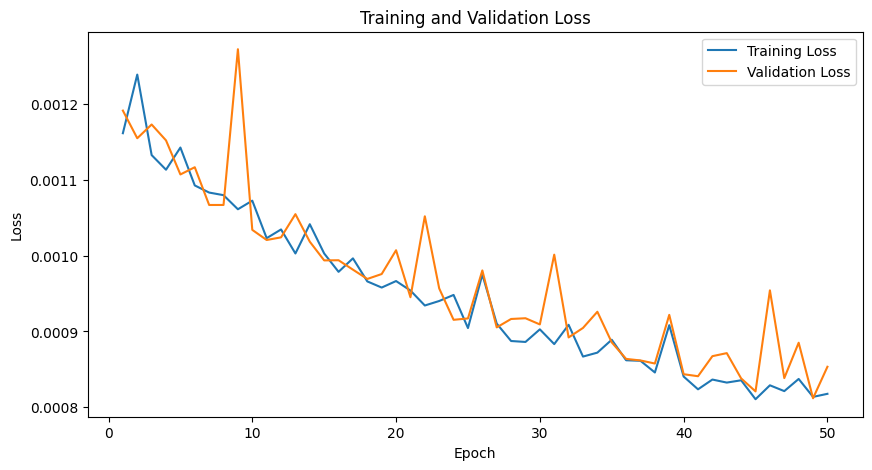

In [196]:
#Training the model

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()  # Reset gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        running_train_loss += loss.item()

    # Compute average training loss for the epoch
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    #Validation Phase
    model.eval()
    running_val_loss = 0.0

    with torch.no_grad():
        for val_images, val_labels in val_loader:
            val_outputs = model(val_images)
            val_loss = criterion(val_outputs, val_labels)  # Compute loss
            running_val_loss += val_loss.item()

    # Compute average validation loss for the epoch
    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

# Plotting the losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Training pretty well, but lots of instability observed.
This is at:
- 50 epochs
- 0.001 lr

Going to include dropouts to curb the instability.
But overall, I think the paramaters I chose generally work for this.


torch.Size([100, 1, 64, 64])


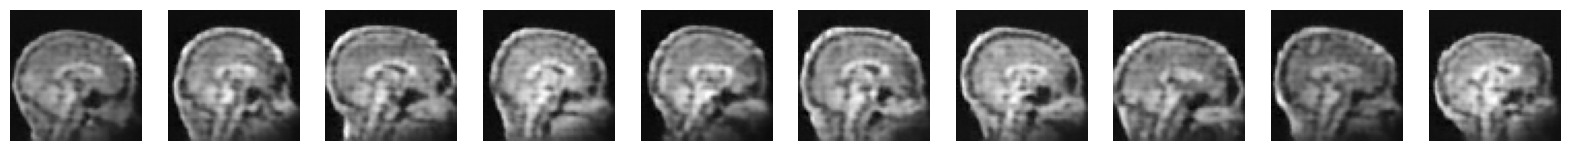

In [207]:
#Applying the model to the test set and previewing the output
model.eval()

test_outputs = []
with torch.no_grad():
    for test_images in test_loader:
        test_images = test_images[0]
        test_output = model(test_images)
        test_outputs.append(test_output)

test_outputs = torch.cat(test_outputs, dim=0)

print(test_outputs.shape)
# Plotting the first 10 elements from the test_outputs
fig, ax = plt.subplots(1, 10, figsize=(20, 4))
for i, img in enumerate(test_outputs[:10]):
    ax[i].imshow(img.squeeze(0).numpy(), cmap='gray')
    ax[i].axis('off')
plt.show()


In [208]:
# Saving output images
output_images = test_outputs.cpu().numpy()
np.save('/content/drive/MyDrive/test_set_nogaps.npy', output_images)

**Network Design Choice and Training**

At the start of the assessment, I did a bit of research to determine what others had used in the past to carry out the type of task I was given, which is filling in the gaps on the images (more accurately known as Image Inpainting). From my research, I stumbled on three major papers, and all three had the unifying factor of using a CNN to go about this type of task. I then referred to the build within the notes, Lectures 4 and 5, and drew some inspiration from the implementations there to build my network. I tried to keep it as simple as possible to be able to use parameters that I understood. I went with Adam as the optimiser, a learning rate of 0.01(a very good guess), and MSE as the loss function.

Within the uNET,

I trained initially for 50 epochs with 1000 datasets and got a really good fit with a lot of instability. This then caused me to modify my model to then include a skip connection and dropouts to fix that problem before going into my bigger dataset and using my compute units.

<br>

---

<br>